In [2]:
from glob import glob
from astropy.io import fits
from astropy.visualization import hist
from astropy.modeling import fitting
from astropy.modeling.models import custom_model
fitter = fitting.LevMarLSQFitter()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy.ndimage as ndi
import astropy.stats as astrostats

# configuration
np.set_printoptions(linewidth=120) # para que se vea

cmap = plt.get_cmap("magma")
cmap.set_bad(color="r")
cmap.set_over(color="w")
if "astro" in plt.colormaps():
    colormaps.unregister("astro")
colormaps.register(cmap,name="astro")
plt.rcParams["image.origin"] = "lower"
plt.rcParams["image.cmap"] = "astro"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.labelsize"] = 15



def quantile_linspace(arr,num=100,lower=0.01,upper=0.99):
    return np.linspace(*np.quantile(np.ravel(arr),[lower,upper]),num=num)

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

def quantile_hist(data,num=100,lower=0.01,upper=0.99):
    return plt.hist(np.ravel(data),bins=quantile_linspace(np.ravel(data),num,lower,upper))

def pseudomode(arr,sigma=1.6,maxiters=20):
    masked = astrostats.sigma_clip(arr,sigma=sigma,maxiters=maxiters)
    return arr[~masked.mask].mean()

In [3]:
glob('*')

['aperture_photometry_1.ipynb',
 'B1 vs. error.png',
 'B2 vs. error.png',
 'diagrama_mag_color.ipynb',
 'Lab4.ipynb',
 'Lab5.ipynb',
 'Lab5.zip',
 'Laboratorio5.ipynb',
 'M92.fits',
 'sextansA_mask.fits',
 'sextansA_PSF.npy',
 'sextans_A.fits',
 'V1 vs. error.png',
 'V2 vs. error.png']

In [4]:
#Abrir SextansA
hdul = fits.open("sextans_A.fits");
images = {hdu.name:hdu.data.astype(float) for hdu in hdul}
headers = {hdu.name:hdu.header for hdu in hdul}
names = ["U", "B", "V", "R", "I", "HALPHA", "OIII", "SII"]
img = []
for name in names:
    img.append(images[name])
hdul.close()

In [5]:
headers

{'B': SIMPLE  =                    T / Fits standard                                  
 BITPIX  =                  -32 / Bits per pixel                                 
 NAXIS   =                    2 / Number of axes                                 
 NAXIS1  =                 1701 / Axis length                                    
 NAXIS2  =                 1501 / Axis length                                    
 EXTEND  =                    T / File may contain extensions                    
 ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
 DATE    = '2015-07-24T20:23:18' / Date FITS file was generated                  
 IRAF-TLM= '2015-07-24T20:23:18' / Time of last modification                     
 OBJECT  = 'SextansA B'         / Name of the object observed                    
 FILENAME= 'obj151  '           / Original host filename                         
 OBSTYPE = 'object  '           / Observation type                               
 PREFLASH= 

In [6]:
#Abrir mask sextansA
hdul1 = fits.open("sextansA_mask.fits");
image = {hdu.name:hdu.data.astype(float) for hdu in hdul1} #image is the mask img
headers1 = {hdu.name:hdu.header for hdu in hdul1}
hdul.close()

In [7]:
headers1

{'PRIMARY': SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                   64 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                 1701                                                  
 NAXIS2  =                 1501                                                  
 EXTEND  =                    T                                                  }

In [8]:
mask = image['PRIMARY'].astype('int32')

In [9]:
from skimage.feature import peak_local_max
from photutils.centroids import centroid_sources, centroid_quadratic


Text(0.5, 1.0, 'B')

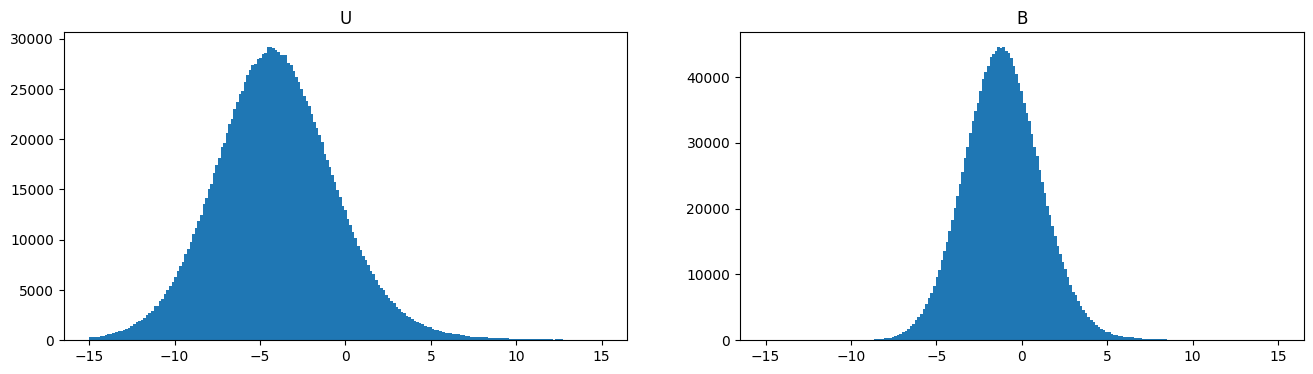

In [10]:
fig,ax = plt.subplots(ncols=2, figsize=(16,4))

plt.sca(ax[0])
plt.hist(img[0][mask==1].ravel(),np.linspace(-15,15,200))
plt.title(names[0])
plt.sca(ax[1])
plt.hist(img[1][mask==1].ravel(),np.linspace(-15,15,200))
plt.title(names[1])

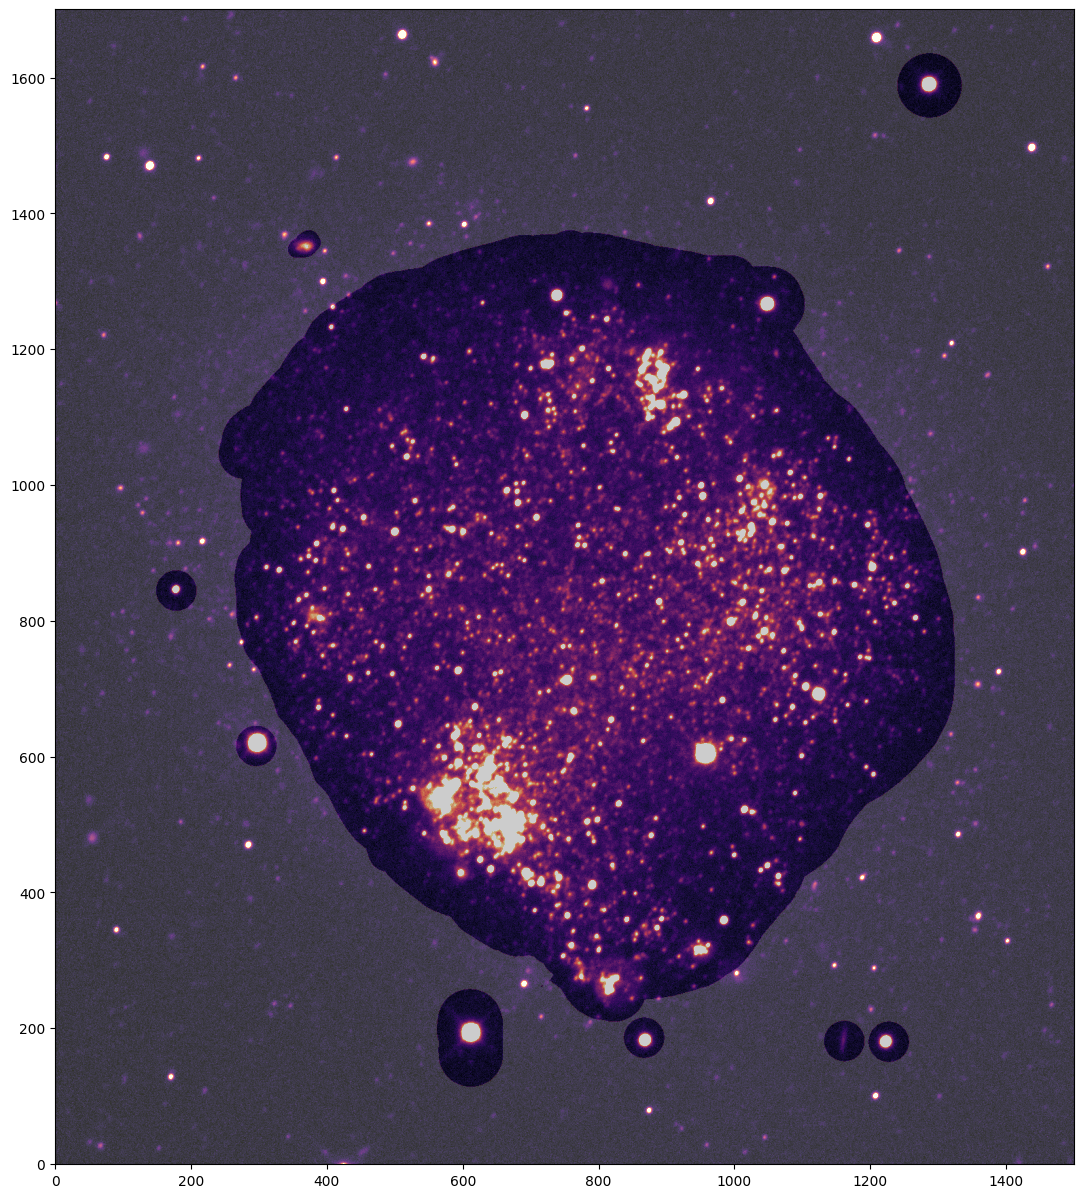

In [11]:
plt.figure(figsize=(15,15))
quantile_imshow(img[0].T)#,vmin=300,vmax=600)
plt.imshow(mask.T,alpha=0.2)

In [12]:
threshold_u = np.quantile(img[0].ravel(),0.8 )
threshold_u

5.1925458908081055

In [13]:
threshold_b = np.quantile(img[1].ravel(),0.8 )
threshold_b

3.872486114501953

In [14]:
peaks_u =  peak_local_max(ndi.gaussian_filter(img[0],5),threshold_abs=threshold_u,labels=mask,exclude_border=30)
peaks_u

array([[1208, 1659],
       [ 511, 1663],
       [ 139, 1470],
       [1437, 1497],
       [ 284,  470],
       [ 964, 1418],
       [ 690,  265],
       [1424,  901],
       [ 394, 1299],
       [1207,  100],
       [1358,  365],
       [ 216,  917],
       [  75, 1483],
       [ 602, 1383],
       [ 874,   79],
       [ 170,  128],
       [1388,  725],
       [1003,  280],
       [1329,  485],
       [1188,  422],
       [ 408, 1263],
       [  90,  345],
       [ 558, 1623],
       [1319, 1208],
       [ 274,  768],
       [1147,  292],
       [ 337, 1368],
       [ 526, 1476],
       [1401,  328],
       [ 211, 1481],
       [ 782, 1554],
       [ 550, 1385],
       [1357,  706],
       [1205,  288],
       [ 293,  728],
       [ 180,  914],
       [  96,  995],
       [ 396, 1344],
       [ 257,  734],
       [  54,  480],
       [1117,  410],
       [ 413, 1482],
       [ 261,  809],
       [ 217, 1616],
       [1309, 1190],
       [ 266, 1600],
       [1329,  561],
       [1460,

In [28]:
peaks_b = peak_local_max(ndi.gaussian_filter(img[1],5),threshold_abs=threshold_b*1.5,labels=mask,exclude_border=30)
peaks_b

array([[1209, 1659],
       [ 139, 1470],
       [ 511, 1663],
       [  76, 1483],
       [1437, 1497],
       [ 965, 1418],
       [ 690,  265],
       [ 284,  470],
       [1424,  901],
       [1207,  100],
       [ 602, 1383],
       [1402,  328],
       [ 211, 1481],
       [1319, 1208],
       [1359,  834],
       [ 558, 1624],
       [ 874,   79],
       [  90,  344],
       [ 128,  959],
       [1389,  725],
       [ 394, 1299],
       [1358,  365],
       [ 217,  917],
       [ 526, 1475],
       [ 407, 1262],
       [ 696,  283],
       [1188,  422],
       [ 959,   30],
       [ 257,  734],
       [ 782, 1554],
       [ 170,  128],
       [ 293,  728],
       [1329,  485],
       [  55,  480],
       [ 274,  768],
       [ 397, 1344],
       [1003,  280],
       [ 217, 1616],
       [1358,  706],
       [ 328,  420],
       [  71, 1221]], dtype=int64)

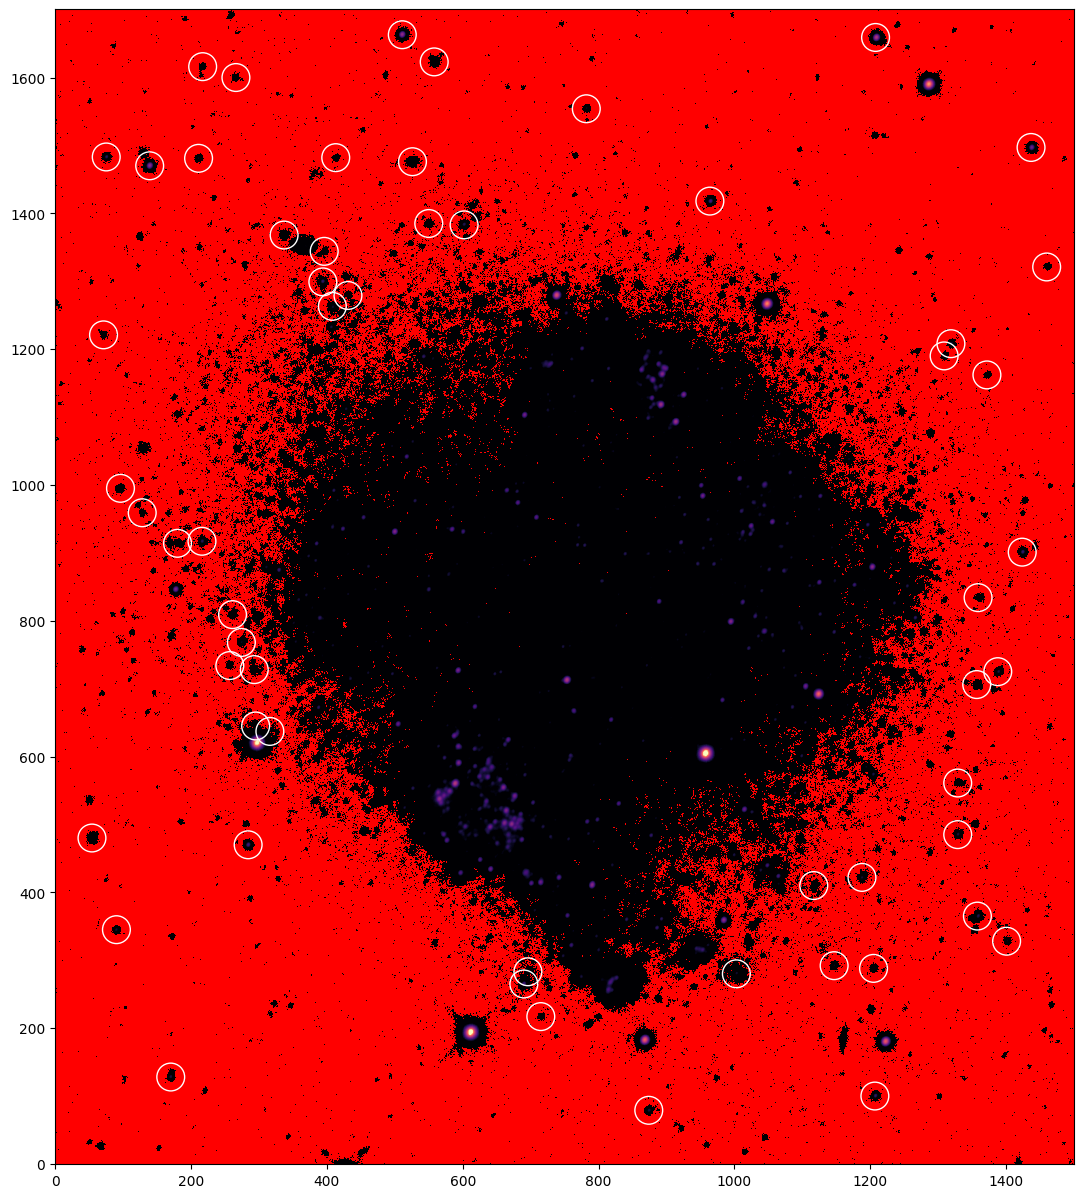

In [16]:
#Graficar los peaks U
plt.figure(figsize=(15,15))
plt.imshow(img[0].T,vmin=70,norm="log")
plt.scatter(*peaks_u.T,fc="none",ec="w",s=400)

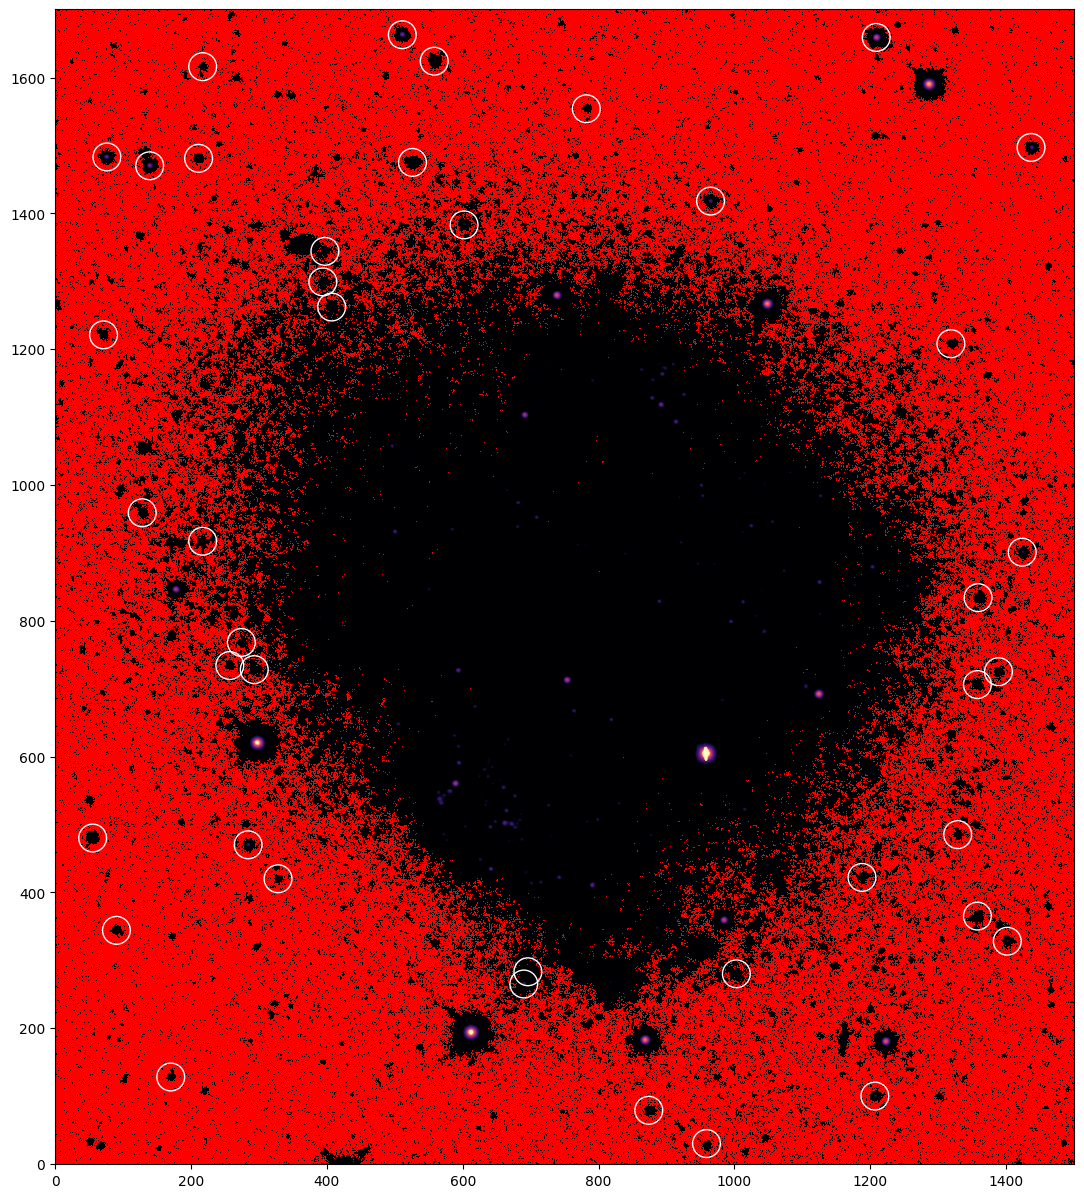

In [29]:
#Graficar los peaks B
plt.figure(figsize=(15,15))
plt.imshow(img[1].T,vmin=70,norm="log")
plt.scatter(*peaks_b.T,fc="none",ec="w",s=400)

In [34]:
centroids_u = np.array(centroid_sources((img[0]-img[0].mean()).T,*peaks_u.T,centroid_func=centroid_quadratic,box_size=19)).T
centroids_u[39]

array([nan, nan])

In [37]:
centroids_u

array([[1208.28936519, 1658.90400271],
       [ 510.42841737, 1663.21610754],
       [ 138.99998836, 1470.14528809],
       [1436.94733493, 1496.85997021],
       [ 284.0149465 ,  469.91189022],
       [ 964.2708622 , 1417.83520944],
       [ 689.66094907,  265.14206421],
       [1423.79465396,  901.22977515],
       [ 393.68454676, 1299.62198797],
       [1207.03398887,  100.27332482],
       [1358.25131429,  365.07469405],
       [ 216.23077813,  916.91226059],
       [  75.4436579 , 1482.93196068],
       [ 601.80485016, 1383.57361329],
       [ 873.82490375,   78.75036734],
       [ 169.97886647,  128.16679712],
       [1388.22735009,  724.87478783],
       [1002.70757405,  280.71834511],
       [1328.49630498,  485.26010954],
       [1187.22034921,  421.61079523],
       [ 408.42981179, 1261.82906531],
       [  89.89053337,  344.72434536],
       [ 558.65684719, 1622.15322874],
       [1318.93562876, 1208.61507154],
       [ 274.18166804,  768.29537453],
       [1146.37241863,  2

In [38]:
centroids_b = np.array(centroid_sources((img[1]-img[1].mean()).T,*peaks_b.T,centroid_func=centroid_quadratic,box_size=19)).T
centroids_b

array([[1208.34034111, 1658.89431707],
       [ 139.09768636, 1470.12017381],
       [ 510.5959274 , 1663.21204536],
       [  75.50599361, 1482.94367094],
       [1437.06259332, 1496.80799497],
       [ 964.40117822, 1417.8281267 ],
       [ 690.00538923,  265.16416483],
       [ 284.16037764,  469.89882394],
       [1424.08002982,  901.18671552],
       [1207.21263974,  100.29224196],
       [ 602.02186639, 1383.66012714],
       [1401.40840543,  328.47472338],
       [ 210.9083971 , 1481.07269641],
       [1319.07680748, 1208.62880609],
       [1358.24690742,  834.18249527],
       [ 554.22548903, 1628.88151324],
       [ 874.0521151 ,   78.80816485],
       [  89.95930186,  344.69179417],
       [ 128.15390931,  958.79997784],
       [1388.45445713,  724.88105229],
       [ 393.83621632, 1299.6288109 ],
       [1358.6123938 ,  365.10989442],
       [ 216.33220848,  916.88196512],
       [ 525.9623068 , 1475.27250028],
       [ 408.40259226, 1261.80103573],
       [ 696.23340928,  2

In [31]:
peaks_u[38:41]


array([[ 257,  734],
       [  54,  480],
       [1117,  410]], dtype=int64)

In [39]:
peaks_u1 = np.delete(peaks_u, 39, 0)
peaks_u1

array([[1208, 1659],
       [ 511, 1663],
       [ 139, 1470],
       [1437, 1497],
       [ 284,  470],
       [ 964, 1418],
       [ 690,  265],
       [1424,  901],
       [ 394, 1299],
       [1207,  100],
       [1358,  365],
       [ 216,  917],
       [  75, 1483],
       [ 602, 1383],
       [ 874,   79],
       [ 170,  128],
       [1388,  725],
       [1003,  280],
       [1329,  485],
       [1188,  422],
       [ 408, 1263],
       [  90,  345],
       [ 558, 1623],
       [1319, 1208],
       [ 274,  768],
       [1147,  292],
       [ 337, 1368],
       [ 526, 1476],
       [1401,  328],
       [ 211, 1481],
       [ 782, 1554],
       [ 550, 1385],
       [1357,  706],
       [1205,  288],
       [ 293,  728],
       [ 180,  914],
       [  96,  995],
       [ 396, 1344],
       [ 257,  734],
       [1117,  410],
       [ 413, 1482],
       [ 261,  809],
       [ 217, 1616],
       [1309, 1190],
       [ 266, 1600],
       [1329,  561],
       [1460, 1321],
       [1359,

In [40]:
len(centroids_u), len(peaks_u1)

(57, 56)

In [41]:
len(centroids_b), len(peaks_b)

(41, 41)

In [42]:
centroids_u1 = centroids_u[~np.isnan(centroids_u.sum(axis=1))]

In [43]:
len(centroids_u1), len(peaks_u1)

(56, 56)

In [44]:
distances_u = np.hypot(*(peaks_u1 - centroids_u1).T)
distances_u

array([ 0.30487324,  0.61107215,  0.14528809,  0.14960599,  0.08936852,  0.31705246,  0.3676109 ,  0.30816168,
        0.69740933,  0.27543002,  0.26217947,  0.24689421,  0.44884483,  0.60590071,  0.30491829,  0.16813062,
        0.2595499 ,  0.77558535,  0.56689121,  0.87139871,  1.24732763,  0.29659471,  1.07166683,  0.6184308 ,
        0.34676993,  0.69298935,  0.66461803,  0.32475161,  0.32067275,  0.16302296,  0.57357277,  0.43617314,
        0.72349646,  0.41254381,  0.92819557,  0.79041695,  0.19522368,  0.57217629,  0.67963874,  2.19754384,
        0.5763078 ,  1.39733556,  0.24260103,  0.63511145,  0.86546351,  1.42043657,  0.7319933 ,  0.88733812,
        9.48683298,  0.36048832,  0.34925157, 12.72792206,  0.48004781,  0.6687973 ,  1.38765359,  0.24785076])

In [45]:
distances_b = np.hypot(*(peaks_b-centroids_b).T)
distances_b

array([0.6680709 , 0.15486888, 0.45633091, 0.49720748, 0.20195014, 0.62299916, 0.16425327, 0.18962485, 0.20314393,
       0.3614153 , 0.6604892 , 0.75851594, 0.11694383, 0.63347966, 0.77488899, 6.17058381, 0.1987881 , 0.69299027,
       0.25238253, 0.55835973, 0.64979092, 0.62217598, 0.67814287, 0.27509486, 1.41663398, 0.96121805, 0.60582903,
       2.12618842, 0.42416288, 0.61815698, 0.23736348, 0.70234945, 0.44301813, 1.06744782, 0.37098431, 0.52129285,
       0.78131351, 0.20000156, 0.35203784, 0.75494093, 0.4327187 ])

Text(0.5, 0, 'Distance correction [pix]')

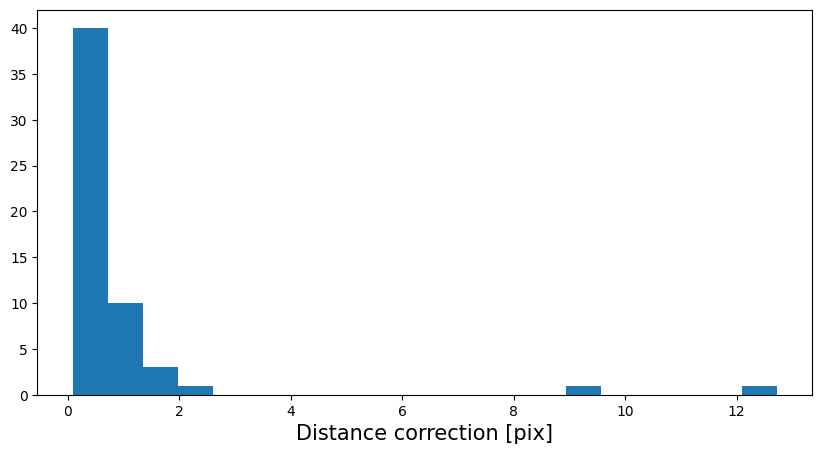

In [87]:
plt.hist(distances_u,bins=20);
plt.xlabel("Distance correction [pix]")

Text(0.5, 0, 'Distance correction [pix]')

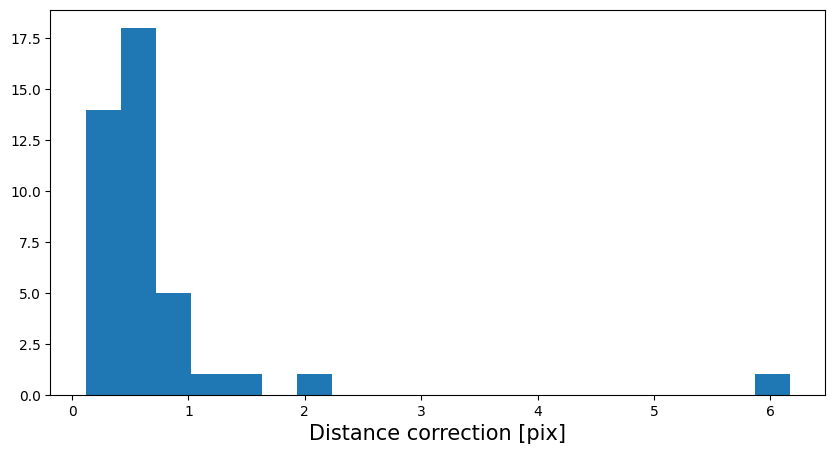

In [46]:
plt.hist(distances_b,bins=20);
plt.xlabel("Distance correction [pix]")

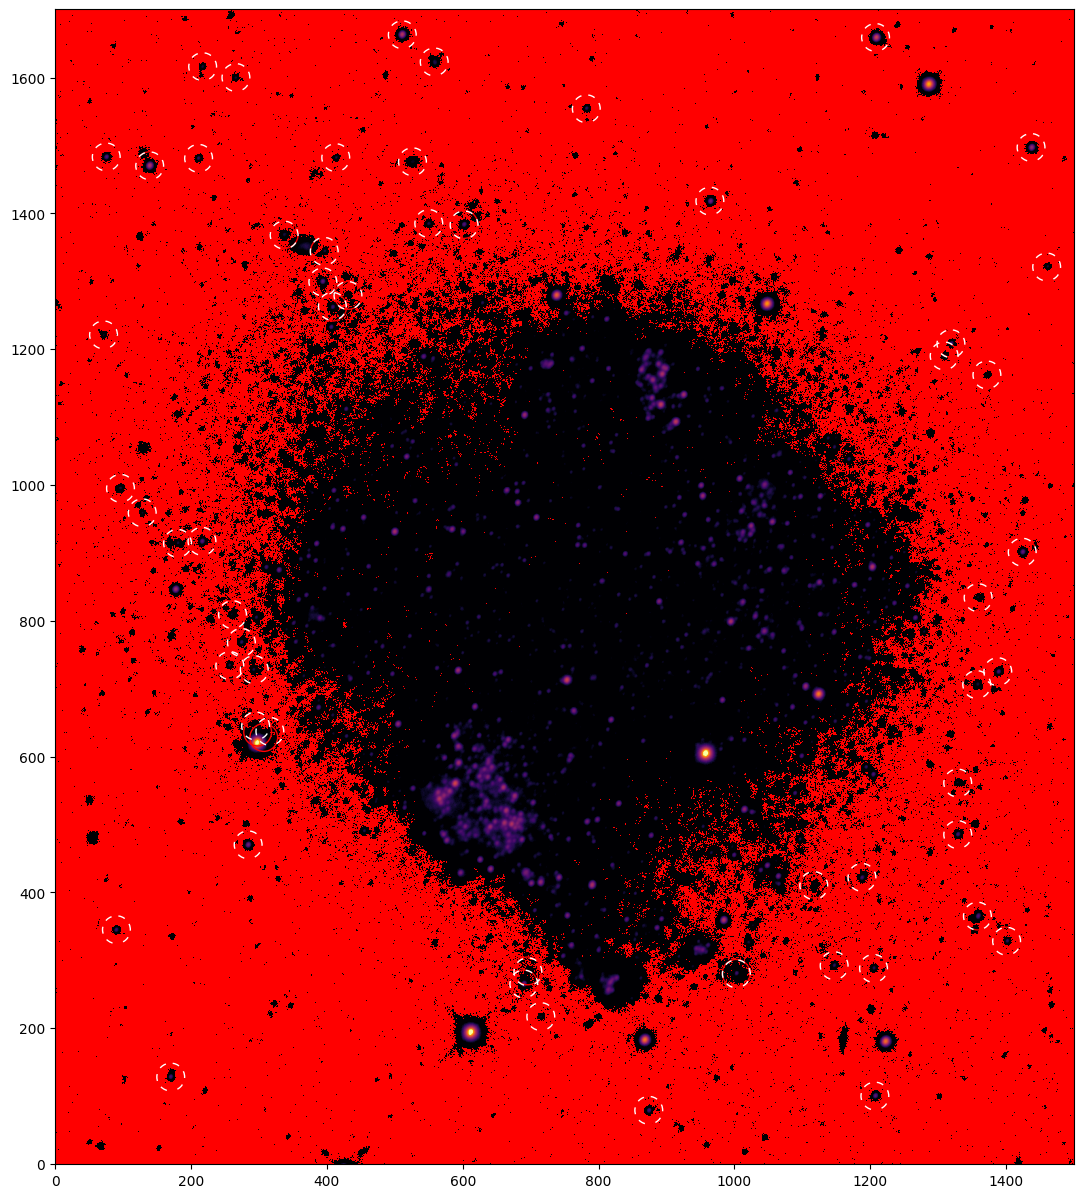

In [94]:
plt.figure(figsize=(15,15))
plt.imshow(img[0].T,vmin=30,norm="log")
plt.scatter(*centroids_u1.T,fc="none",ec="r",s=400)
plt.scatter(*peaks_u1.T,fc="none",ec="w",s=400,linestyle=(5,(5,5)))

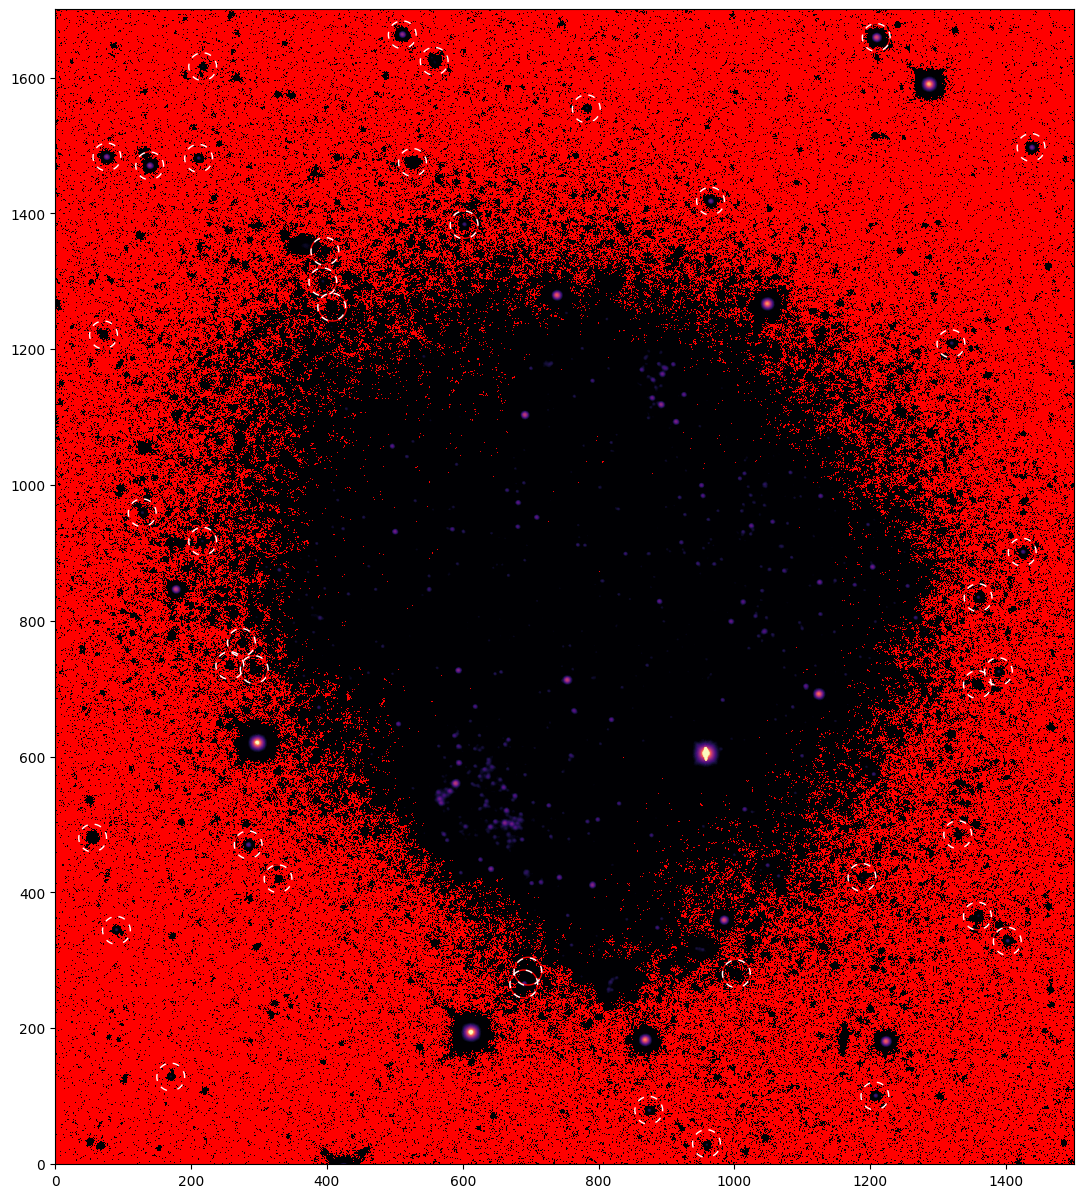

In [47]:
plt.figure(figsize=(15,15))
plt.imshow(img[1].T,vmin=30,norm="log")
plt.scatter(*centroids_b.T,fc="none",ec="r",s=400)
plt.scatter(*peaks_b.T,fc="none",ec="w",s=400,linestyle=(5,(5,5)))

In [48]:
from photutils.aperture import CircularAperture, ApertureStats
from photutils.profiles import RadialProfile
from astropy.modeling.models import Gaussian1D,Voigt1D,Const1D
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter(calc_uncertainties=True)

In [49]:
model = Const1D(100) + Gaussian1D(5e3,0,1.5)
model.mean_1.fixed = True

In [50]:
radii = np.arange(0,10,1)
profile_u = RadialProfile(img[0].T,centroids_u1,radii)
fitted_model = fitter(model,profile_u.radius,profile_u.profile)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [51]:
params = []
params_std = []
for c in centroids_u:
    try:
        profile = RadialProfile(img[0].T,c,radii)
        fitted_model = fitter(model,profile.radius,profile.profile)
        params_std.append(np.sqrt(np.diag(fitter.fit_info["param_cov"])))
        params.append(fitted_model.parameters)
    except ValueError:
        pass
    #plt.plot(profile.radius,profile.gaussian_profile)
    #plt.plot(profile.radius,profile.profile,". k")
    #plt.show()
    #plt.close()

params = np.asarray(params)
params_std = np.asarray(params_std)

In [52]:
x = np.log10(params.T[1])
y = 2*np.sqrt(2*np.log(2))*params.T[3]
dx = params_std.T[1]/params.T[1] / np.log(10)
dy = 2*np.sqrt(2*np.log(2))*params_std.T[2]


samples = np.random.normal(loc=y,scale=dy,size=(10_000,len(y)))
means = samples.mean(axis=1)

FWHM = means.mean()
FWHM_err = means.std()

Text(0.5, 1.0, 'FWHM mean = $5.452\\pm0.015$')

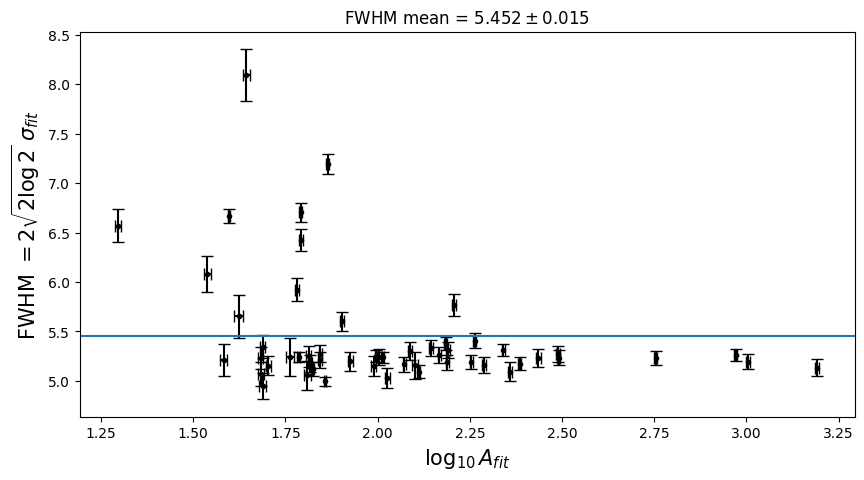

In [53]:
plt.errorbar(x,y,dy,dx,fmt=". k",capsize=4)

plt.xlabel("$\\log_{10} A_{fit}$")
plt.ylabel("FWHM $= 2\\sqrt{2\\log 2}\\;\\sigma_{fit}$")

plt.axhline(FWHM)
plt.title(f"FWHM mean = ${FWHM:.3f}\\pm{FWHM_err:.3f}$")

In [54]:
import sklearn
from sklearn.neighbors import NearestNeighbors

In [55]:
min_distance = NearestNeighbors(n_neighbors=2).fit(centroids_u1).kneighbors(centroids_u1)[0][:,1].min() 
#saca mis datos y mira al siguiente vecino porque el primero es sí mismo. Calcula la distancia minmina
min_distance

12.041594578792296

In [56]:
from photutils.aperture import CircularAnnulus

In [57]:
FWHM

5.451645506402223

In [58]:
min_distance / FWHM 

2.2087999971111594

In [59]:
r_in = 2.0*FWHM
r_in

10.903291012804447

In [60]:
r_out = (min_distance-r_in*0.05)
r_out

11.496430028152073

In [61]:
sky_apertures = CircularAnnulus(centroids_u1, r_in, r_out)
star_apertures = CircularAperture(centroids_u1, FWHM)

(41.73966646647947, 93.36951196770278)

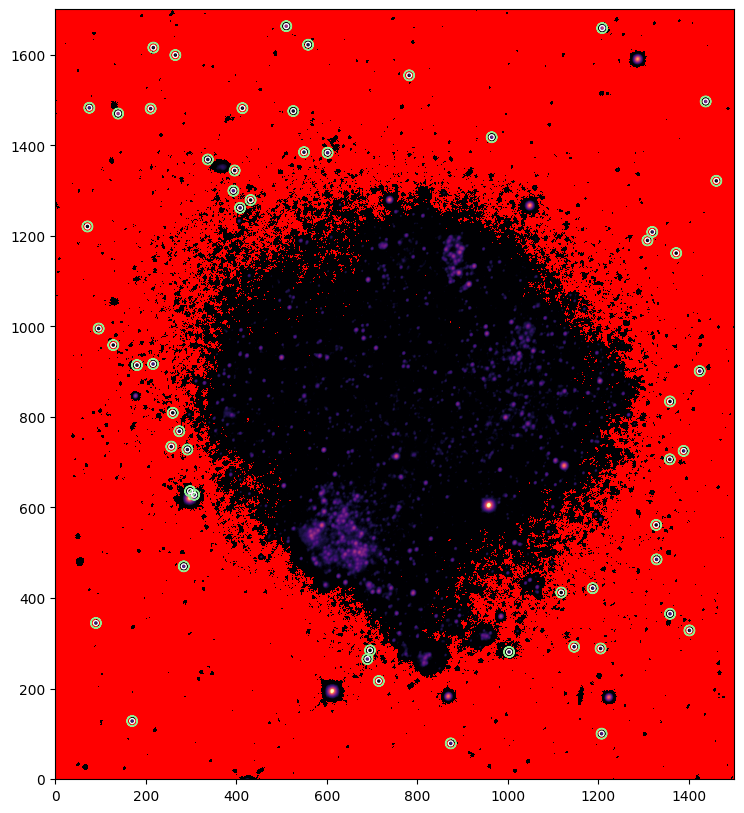

In [62]:
plt.figure(figsize=(10,10))
#quantile_imshow(img.T);
plt.imshow(img[0].T, vmin=20, norm='log')
sky_apertures.plot(color='lightgreen');
star_apertures.plot(color='w')

sky_apertures.area, star_apertures.area

In [63]:
sky_values = ApertureStats(img[0].T,sky_apertures).median

In [64]:
star_values = ApertureStats(img[0].T,star_apertures).sum / star_apertures.area 

In [65]:
from photutils.aperture import aperture_photometry

In [66]:
aperture_photometry(img[0].T, star_apertures)

<QTable length=56>
  id       xcenter            ycenter          aperture_sum   
             pix                pix                           
int32      float64            float64            float64      
----- ------------------ ------------------ ------------------
    1    1208.2893651851 1658.9040027080398  49520.45857260634
    2  510.4284173660619 1663.2161075404335 32406.697598542833
    3 138.99998836175538 1470.1452880862773 30388.099161556634
    4  1436.947334933644 1496.8599702104807 18105.081985497138
    5 284.01494649627426 469.91189021632624   9883.60739508346
    6  964.2708622023357 1417.8352094363045  9852.414584813518
    7  689.6609490680548 265.14206421454054  8979.528203298229
    8 1423.7946539570758  901.2297751542078  7429.563943455285
    9  393.6845467639608  1299.621987968774 6997.7579364234625
  ...                ...                ...                ...
   47 1460.4734839146865 1321.5582357675084 1623.7100994978105
   48 1358.1248660147792  834.1466610199313  1372.437971103839
   49              298.0              636.0 3523.2355792079666
   50  128.2220248196978  958.7159985805409 1307.7374819451818
   51  71.20765863190194 1220.7191894743146 1339.1097676035124
   52              307.0              628.0  14837.59172234354
   53  714.8880007406125  216.5332001829636 1269.0207435766458
   54 431.65652588048437 1279.1275288172758   1116.58842597488
   55  695.4962131893298  284.2929738369001  878.1846487211466
   56  1371.847993338046 1161.8042349045315 1273.2233243253147

In [122]:
mag_instr = -2.5* np.log10( (star_values - sky_values) / headers['U']['EXPTIME']) +20
mag_instr

array([20.13908925, 20.596309  , 20.66669529, 21.2139632 , 21.85448916, 21.85274388, 21.99842677, 22.15526834,
       22.24626042, 22.215169  , 22.36896195, 22.38640155, 22.39318342, 22.47657179, 22.60503714, 22.59247714,
       22.63123683, 22.92548944, 22.67761991, 22.79162081, 22.83305019, 22.70417768, 22.901497  , 22.88760137,
       23.05642793, 23.15638386, 23.26364714, 23.36020062, 23.14747619, 23.09228011, 23.08656151, 23.21394086,
       23.235091  , 23.26848876, 23.60122084, 23.54873789, 23.40635725, 23.59137524, 23.49610993, 23.92755368,
       23.54784578, 23.84499292, 23.6369752 , 23.70513156, 23.60714122, 23.8201971 , 23.55758395, 23.79733479,
       23.47659997, 23.85406789, 23.77664246, 21.58984841, 23.9082721 , 24.198076  , 24.72590144, 23.75961548])

In [81]:
from photutils.utils import calc_total_error

In [ ]:
background = np.sqrt(25)*np.std(bias - bias_model)
background_img = np.ones_like(bias)*background
img_err = calc_total_error(img,background_img,10.5)

In [123]:
sky_values_err = ApertureStats(img[0].T,sky_apertures, sigma_clip=astrostats.SigmaClip()).median
star_values_err = ApertureStats(img[0].T, star_apertures).sum / star_apertures.area
sky_values_err, star_values_err

(array([ 2.51464844,  0.97726899,  0.65660018, -2.23205268, -2.82924509, -3.38579261,  0.94046956, -2.8505187 ,
        -0.84921265, -4.21029663, -1.53371733, -2.0996871 , -4.16148233, -1.77932286, -3.22291565, -3.65613556,
        -3.22846746,  3.02190483, -2.07402039, -2.4350189 , -1.32632369, -4.54055929, -2.74281502, -2.94137859,
        -2.09678495, -2.43062901, -1.92140424, -1.05005193, -2.53968656, -4.15495062, -4.35065007, -2.62872171,
        -2.8582139 , -3.5093627 ,  0.28084716, -1.04211271, -3.71417999, -1.62679291, -3.18543553, -0.20771638,
        -2.5302918 , -0.75053939, -2.57788467, -2.34356225, -4.98216438, -3.21013951, -5.26242685, -3.46524954,
         8.26690388, -3.54003298, -4.17169929, 11.25256586, -2.80856323, -0.59919891,  1.6823929 , -5.169981  ]),
 array([530.37075517, 347.08007909, 325.46061901, 193.90785711, 105.85476123, 105.52068204,  96.17195179,  79.57162661,
         74.94692635,  73.7877361 ,  66.16282249,  64.51816576,  62.04155021,  59.52943749,  5

In [83]:
star_errors = [np.linalg.norm( s.to_mask().get_values(img_err.T)/ star_apertures.area) for s in star_apertures]
star_errors

NameError: name 'img_err' is not defined

In [124]:
#error magnitud estrellas
err_mag = 2.5*(1/np.log(10))*(np.sqrt(star_values_err**2 + sky_values_err**2)/(abs(sky_values-star_values)))
err_mag


array([1.09092079, 1.08774746, 1.08830473, 1.07345174, 1.05738757, 1.05252315, 1.09651094, 1.04885905, 1.07364064,
       1.02879938, 1.06142308, 1.05207225, 1.01977384, 1.05469643, 1.0238402 , 1.01625088, 1.01945223, 1.16945793,
       1.0424725 , 1.02971075, 1.0599602 , 0.99154346, 1.01831947, 1.01253567, 1.02435362, 1.0084459 , 1.01791255,
       1.04461661, 1.00576873, 0.96476553, 0.96016262, 0.99815672, 0.98919751, 0.96549381, 1.1386833 , 1.04378611,
       0.94226148, 1.00851215, 0.95245327, 1.07182964, 0.97299472, 1.03991795, 0.96203338, 0.95943898, 0.87236306,
       0.91109646, 0.87083597, 0.9026919 , 1.71842127, 0.9098349 , 0.87594582, 1.24668526, 0.91880955, 1.03522792,
       1.34323923, 0.84194261])

In [125]:
len(mag_instr), len(err_mag)

(56, 56)

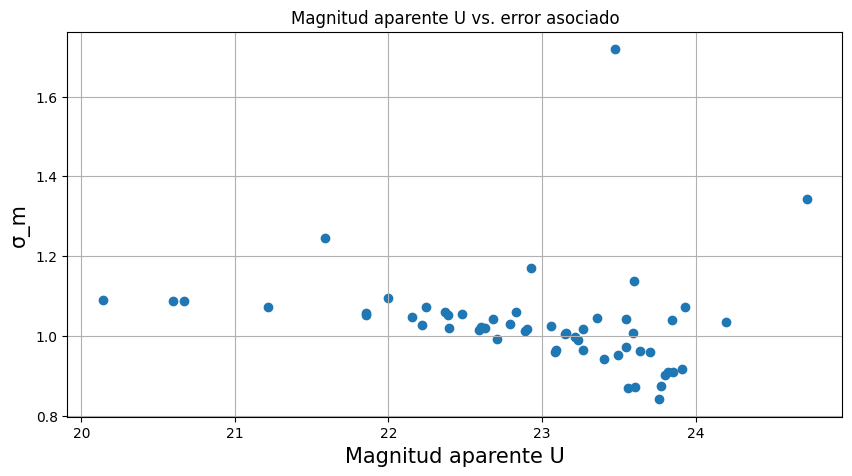

In [126]:
plt.scatter(mag_instr, err_mag)
plt.xlabel('Magnitud aparente U')
plt.ylabel('σ_m')
#plt.gca().invert_xaxis()
plt.title('Magnitud aparente U vs. error asociado')
plt.grid()
#plt.savefig('U vs. error.png')

In [68]:
#Filtro B
radiib = np.arange(0,10,1)
profile_b = RadialProfile(img[1].T,centroids_b,radiib)
fitted_modelb = fitter(model,profile_b.radius,profile_b.profile)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [69]:
#Ahora para el filtro B
paramsb = []
params_stdb = []
for c in centroids_b:
    try:
        profileb = RadialProfile(img[1].T,c,radiib)
        fitted_modelb = fitter(model,profileb.radius,profileb.profile)
        params_stdb.append(np.sqrt(np.diag(fitter.fit_info["param_cov"])))
        paramsb.append(fitted_modelb.parameters)
    except ValueError:
        pass
    #plt.plot(profile.radius,profile.gaussian_profile)
    #plt.plot(profile.radius,profile.profile,". k")
    #plt.show()
    #plt.close()

paramsb = np.asarray(paramsb)
params_stdb = np.asarray(params_stdb)

In [70]:
xb = np.log10(paramsb.T[1])
yb = 2*np.sqrt(2*np.log(2))*paramsb.T[3]
dxb = params_stdb.T[1]/paramsb.T[1] / np.log(10)
dyb = 2*np.sqrt(2*np.log(2))*params_stdb.T[2]


samplesb = np.random.normal(loc=yb,scale=dyb,size=(10_000,len(yb)))
meansb = samplesb.mean(axis=1)

FWHMb = meansb.mean()
FWHM_errb = meansb.std()

Text(0.5, 1.0, 'FWHM mean = $5.069\\pm0.023$')

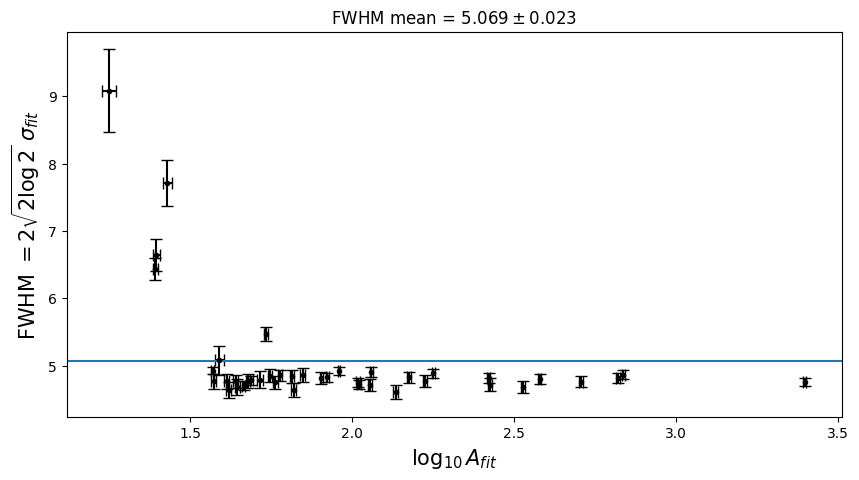

In [71]:
plt.errorbar(xb,yb,dyb,dxb,fmt=". k",capsize=4)

plt.xlabel("$\\log_{10} A_{fit}$")
plt.ylabel("FWHM $= 2\\sqrt{2\\log 2}\\;\\sigma_{fit}$")

plt.axhline(FWHMb)
plt.title(f"FWHM mean = ${FWHMb:.3f}\\pm{FWHM_errb:.3f}$")

In [72]:
min_distanceb = NearestNeighbors(n_neighbors=2).fit(centroids_b).kneighbors(centroids_b)[0][:,1].min() 
#saca mis datos y mira al siguiente vecino porque el primero es sí mismo. Calcula la distancia minmina
min_distanceb

19.774648073466057

In [73]:
FWHMb

5.068663033889026

In [74]:
r_inb = 2.0*FWHMb
r_inb

10.137326067778051

In [75]:
r_outb = (min_distanceb-r_inb*0.05)
r_outb

19.267781770077153

In [76]:
sky_aperturesb = CircularAnnulus(centroids_b, r_inb, r_outb)
star_aperturesb = CircularAperture(centroids_b, FWHMb)

(843.4611873155733, 80.71174055925815)

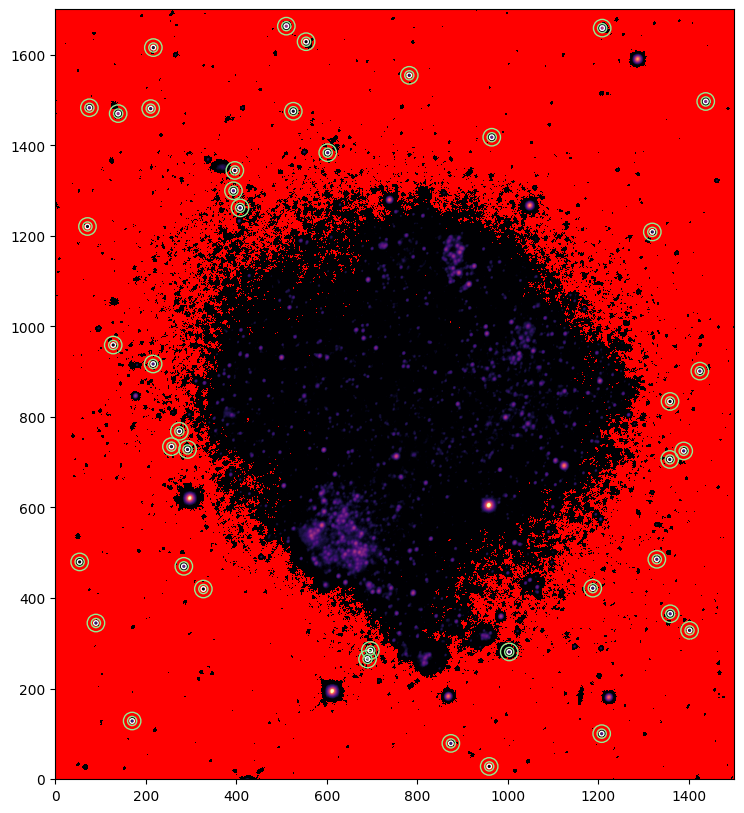

In [77]:
plt.figure(figsize=(10,10))
#quantile_imshow(img.T);
plt.imshow(img[0].T, vmin=20, norm='log')
sky_aperturesb.plot(color='lightgreen');
star_aperturesb.plot(color='w')

sky_aperturesb.area, star_aperturesb.area

In [78]:
sky_valuesb = ApertureStats(img[1].T,sky_aperturesb).median
star_valuesb = ApertureStats(img[1].T,star_aperturesb).sum / star_aperturesb.area 

In [79]:
aperture_photometry(img[1].T, star_aperturesb)

<QTable length=41>
  id       xcenter            ycenter          aperture_sum   
             pix                pix                           
int32      float64            float64            float64      
----- ------------------ ------------------ ------------------
    1 1208.3403411124098  1658.894317074239  67329.04661711017
    2 139.09768636326555 1470.1201738073348 19142.714174773217
    3 510.59592739544576 1663.2120453569044 18210.504667339013
    4  75.50599360892981 1482.9436709426789 13754.634199871361
    5 1437.0625933242427 1496.8079949663763   10303.2063223503
    6  964.4011782243125 1417.8281266976892   8971.83428521743
    7  690.0053892305228  265.1641648327491  7408.115450325597
    8  284.1603776408871 469.89882394202067  7203.099336789579
    9 1424.0800298219667  901.1867155193089  4910.751873105238
  ...                ...                ...                ...
   32  292.3009403259656  728.0678993636885  1245.105730113515
   33 1329.0236529139042    485.44238626379  1289.334292877388
   34  53.99375215410643  479.6437555245477 1014.9764416383478
   35 274.30087144388324  768.2170385549366 1179.1979788099834
   36  396.8160053636928   1344.48774194436  1117.591888832184
   37  1002.995249666483 280.78129906787694 1064.8643731142497
   38 216.82701037550623 1615.8996246387483 1200.7569833295715
   39 1357.6533410647344  706.0613043703859 1030.1123360543968
   40  327.2744689724528  419.7913362943044  1118.749421696898
   41  71.27890663381665 1220.6691578034772 1018.1156051278094

In [127]:
mag_instrb = -2.5* np.log10( (star_valuesb - sky_valuesb) / headers['B']['EXPTIME']) +20
mag_instrb

array([17.14408836, 18.50582517, 18.55810114, 18.859927  , 19.16843726, 19.32387626, 19.56005486, 19.55832829,
       19.97222256, 20.06329405, 20.16576923, 20.32375711, 20.4398755 , 20.50870816, 20.57041436, 21.16032738,
       20.58531824, 20.69632884, 20.81396291, 20.84172567, 20.98586833, 20.99800941, 21.05543929, 21.30241415,
       21.40491813, 21.68254399, 21.27241814, 21.09551026, 21.25477691, 21.17109112, 21.20812191, 21.50540064,
       21.37997124, 21.60035623, 21.54967295, 21.61967969, 21.68524211, 21.41875412, 21.6388351 , 21.52967113,
       21.59337269])

In [110]:
from photutils.utils import calc_total_error

In [128]:
sky_values_errb = ApertureStats(img[1].T,sky_aperturesb, sigma_clip=astrostats.SigmaClip()).median
star_values_errb = ApertureStats(img[1].T, star_aperturesb).sum / star_aperturesb.area
sky_values_errb, star_values_errb

(array([ 1.25799179, -0.44325334, -0.80336341, -1.05178601, -1.39779377, -0.68210298,  1.69361722, -0.87670019,
        -0.72623023, -0.91901475,  0.11778335, -0.90413895, -1.35461122, -1.02735364, -0.46772003, -0.82607689,
        -0.90692294, -1.49367601, -0.46278037, -0.76798669,  0.26662788, -0.57057303, -0.16612244, -0.70848846,
         0.64163208,  2.07848883, -0.29949875, -1.09116822, -0.36608887, -1.43808818, -1.68973923,  0.39214325,
        -0.87432519, -1.15577602,  0.21265945,  0.26014632,  0.48609313, -1.37239611, -0.50845414, -0.89962691,
        -1.21763992]),
 array([834.1914838 , 237.17384908, 225.62398656, 170.4167709 , 127.65436913, 111.15897418,  91.78485557,  89.24475283,
         60.84309221,  55.68322658,  51.64816029,  43.62542124,  38.6656686 ,  36.54297004,  35.003065  ,  19.98596644,
         34.09593717,  30.10318427,  27.90982533,  26.88198541,  24.43298785,  23.38837388,  22.53124749,  17.37692193,
         17.15358161,  15.0206889 ,  18.28641832,  20.780

In [129]:
#Error en las magnitudes
err_magb = 2.5*(1/np.log(10))*(np.sqrt(star_values_errb**2 + sky_values_errb**2)/(abs(sky_valuesb-star_valuesb)))
err_magb

array([1.08761368, 1.08385378, 1.08193594, 1.07910691, 1.07401338, 1.07913625, 1.10774543, 1.07524649, 1.07325842,
       1.06825326, 1.08877151, 1.06391957, 1.04982075, 1.05689473, 1.0712323 , 1.05390105, 1.05817277, 1.0357406 ,
       1.06899346, 1.05657867, 1.0962834 , 1.06146592, 1.07781898, 1.04441296, 1.13291869, 1.29240632, 1.06838361,
       1.03285762, 1.06585066, 1.01210971, 0.99706661, 1.11723135, 1.03190545, 0.99784107, 1.10189006, 1.11395618,
       1.12803368, 0.99869575, 1.04568132, 1.02837244, 0.99493912])

In [130]:
len(mag_instrb), len(err_magb)

(41, 41)

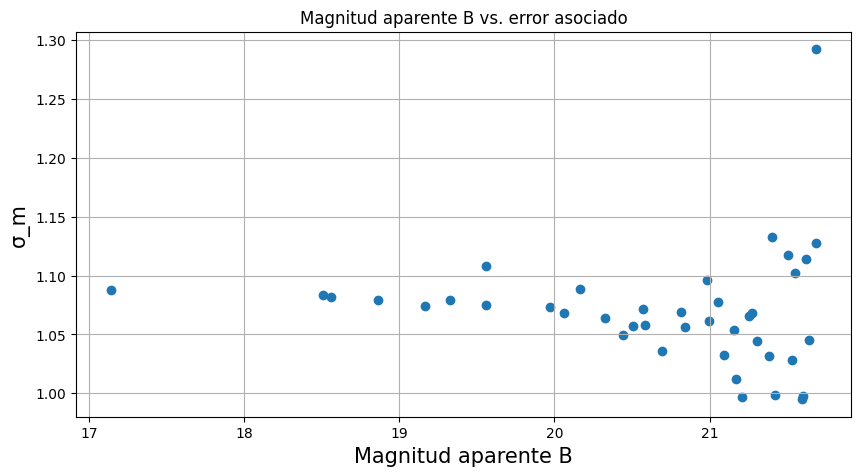

In [131]:
plt.scatter(mag_instrb, err_magb)
plt.xlabel('Magnitud aparente B')
plt.ylabel('σ_m')
#plt.gca().invert_xaxis()
plt.title('Magnitud aparente B vs. error asociado')
plt.grid()
#plt.savefig('B vs. error.png')

In [132]:
color = []
for i in range(len(mag_instrb)):
    color.append(mag_instr[i] - mag_instrb[i])

color

[2.9950008870256717,
 2.090483832535817,
 2.108594148073365,
 2.3540361929123925,
 2.686051900711476,
 2.528867614186577,
 2.43837190190688,
 2.596940046775387,
 2.274037860805663,
 2.151874949061323,
 2.2031927144181687,
 2.062644436929883,
 1.953307916554028,
 1.9678636328238,
 2.0346227757912203,
 1.4321497537831647,
 2.0459185835485876,
 2.2291606027737814,
 1.863656994290789,
 1.9498951379977996,
 1.8471818551098806,
 1.706168268979006,
 1.8460577161388407,
 1.5851872111492469,
 1.6515098021994632,
 1.4738398662051786,
 1.9912290014036707,
 2.2646903679151578,
 1.8926992799844804,
 1.9211889941978093,
 1.8784396003006485,
 1.7085402254515607,
 1.8551197552239174,
 1.6681325314935513,
 2.0515478898729924,
 1.9290581986371045,
 1.7211151375579448,
 2.1726211212470368,
 1.8572748320961523,
 2.39788255572412,
 1.9544730940831094]

In [116]:
len(color)

41

In [133]:
sizeu = mag_instr[:41]
len(sizeu)

41

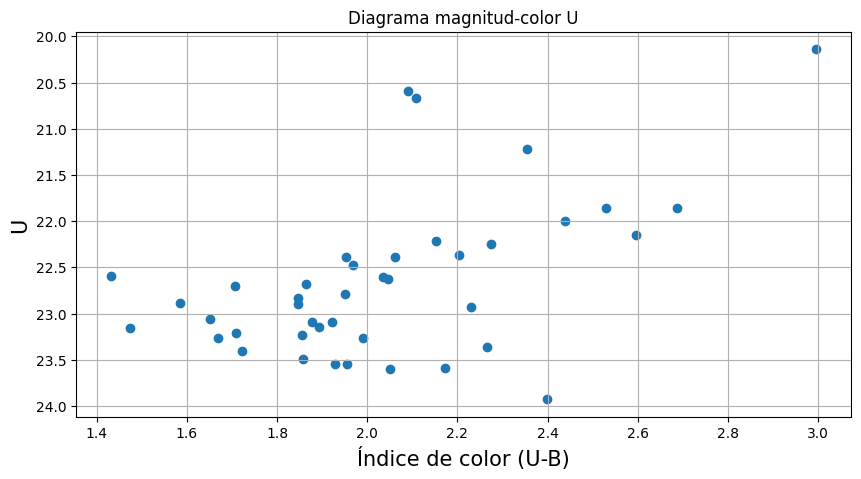

In [146]:

plt.scatter(color, sizeu)
plt.gca().invert_yaxis()
plt.xlabel('Índice de color (U-B)')
plt.ylabel('U')
plt.title('Diagrama magnitud-color U')
plt.grid()
plt.savefig('U mag-color_1.png')

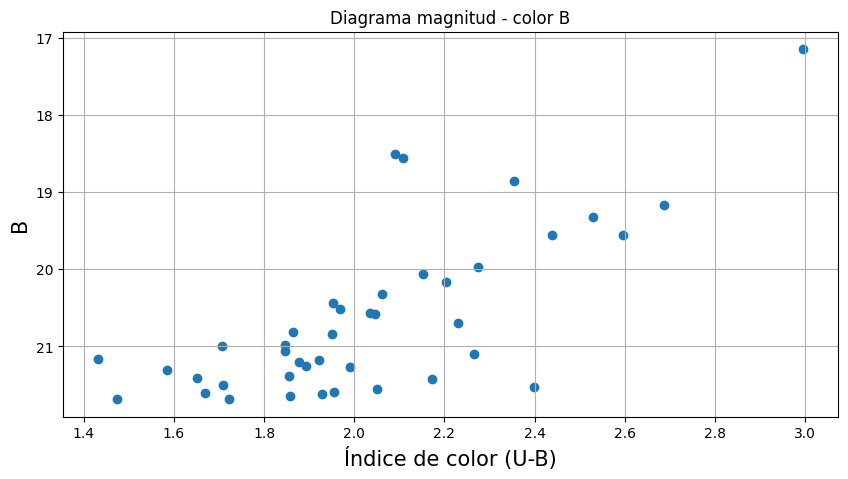

In [147]:
plt.scatter(color, mag_instrb)
plt.gca().invert_yaxis()
plt.xlabel('Índice de color (U-B)')
plt.ylabel('B')
plt.title('Diagrama magnitud - color B')
plt.grid()
plt.savefig('B mag-color1.png')

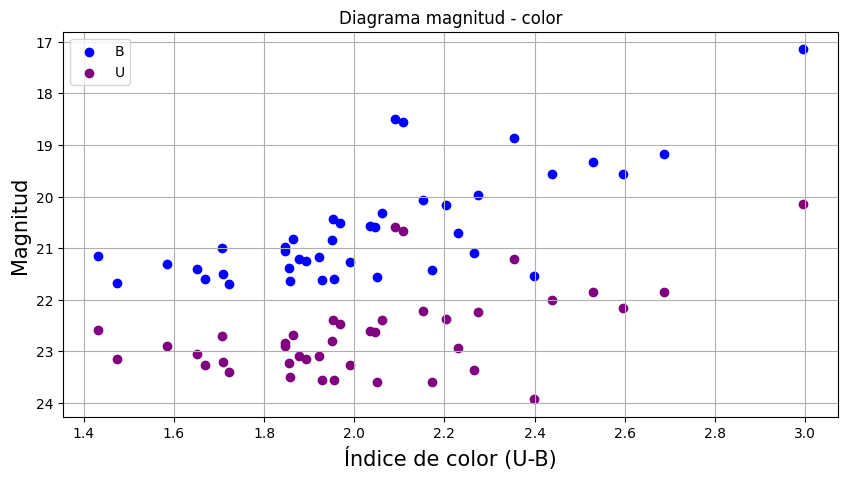

In [159]:
plt.subplots()
plt.scatter(color, mag_instrb, color='blue', label='B')
plt.scatter(color, sizeu, color='purple', label='U')
plt.gca().invert_yaxis()
plt.xlabel('Índice de color (U-B)')
plt.ylabel('Magnitud')
plt.title('Diagrama magnitud - color')
plt.legend()
plt.grid()
plt.savefig('Magnitudes vs color.png')

In [148]:
#Zt es el ángulo cenital. Se saca con el header Zenital Distance. La idea es usar la fórmula que nos dan y comparar con la de secante
z = headers['U']['ZD']
z

'36.8790'

In [151]:
type(z)

str

In [149]:
radians = z

In [156]:
k_u = 0.6
k_b = 0.4

In [161]:
air_mass_u = headers['U']['AIRMASS']
air_mass_u*k_u

0.75

In [163]:
air_mass_b = headers['B']['AIRMASS']
air_mass_b*k_b

0.5296000000000001